### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 5


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №25

1. Набор данных deep_weeds

2. Классы с метками 5,6,7

3. Требования к архитектуре сети MLP:

Кол-во скрытых слоев 5

Кол-во нейронов 120 в первом скрытом слое, уменьшающееся на 15 с каждым последующим скрытым слоем

Оптимизатор Adafactor

Функция активации в скрытых слоях relu

Регуляризация L2 в каждом четном скрытом слое

4. Требования к архитектуре сети CNN:

Кол-во сверточных слоев 5

Количество фильтров в сверточных слоях 8

Размеры фильтра  3х3

Оптимизатор Adamax

Функция активации в сверточных слоях swish

Функция активации в скрытых плотных слоях selu

Слои dropout после каждого скрытого плотного слоя

5. Показатель качества бинарной классификации:

индекс Rand, равный (TP + TN)/(TP + TN + FP + FN)

6. Показатель качества многоклассовой классификации:

максимальная точность классов, где точность (precision) класса равна доле правильных предсказаний для всех точек, относимых классификатором к этому классу.



1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании). Отследите обучение нейронных сетей и укажите, на сколько процентов снизились в результате обучения потери по отношению к потерям на первой эпохе обучения. Оцените результаты обучения нейронных сетей (варианты: нейронная сеть обучилась, недообучилась, переобучилась).   

4. Постройте кривые обучения нейронных сетей бинарной классификации для показателей потерь и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

5. Сравните качество бинарной классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании).

8. Сравните качество многоклассовой классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

9. Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


# 1. датасет

# 1. датасет

In [1]:
%pip install tfds-nightly
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow
%pip install pillow
# %pip install tensorflow_model_analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
!mkdir -p /root/tensorflow_datasets/downloads/manual && cd /root/tensorflow_datasets/downloads/manual && wget -O images.zip "https://drive.usercontent.google.com/download?id=1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj&export=download&authuser=0&confirm=t&uuid=bef7829d-00b0-448e-a22b-b8f33c715285&at=APZUnTUhd8GeugS_BX7HgqF6EjVX%3A1715969689771"
ds = tfds.load("deep_weeds", split='train')
df = tfds.as_dataframe(ds)
df.head(3)

--2024-05-17 20:09:59--  https://drive.usercontent.google.com/download?id=1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj&export=download&authuser=0&confirm=t&uuid=bef7829d-00b0-448e-a22b-b8f33c715285&at=APZUnTUhd8GeugS_BX7HgqF6EjVX%3A1715969689771
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491516047 (469M) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 468.75M  51.3MB/s    in 12s     

2024-05-17 20:10:11 (40.0 MB/s) - ‘images.zip’ saved [491516047/491516047]



,image,label
0,"[[[200, 213, 230], [213, 225, 239], [245, 255,...",1
1,"[[[207, 195, 217], [166, 155, 172], [170, 163,...",7
2,"[[[156, 207, 130], [167, 215, 141], [130, 169,...",7


In [3]:
len(df)

17509

In [4]:
import random
random.seed('Генералов Даниил')
rng_seed = random.randint(0, 2**32-1)

In [5]:
random.seed(rng_seed)
test_ratio = 0.25

train = pd.DataFrame(columns=df.columns)
test = pd.DataFrame(columns=df.columns)
for row_idx in range(len(df)):
    row = df.loc[row_idx, :]
    if random.random() < test_ratio:
        test.loc[len(test), :] = row
    else:
        train.loc[len(train), :] = row

len(train), len(test)

(13139, 4370)

# 2. визуализация

In [6]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

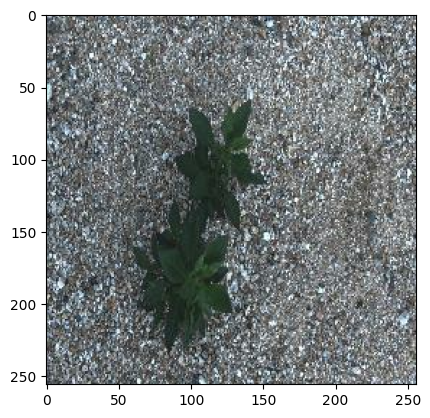

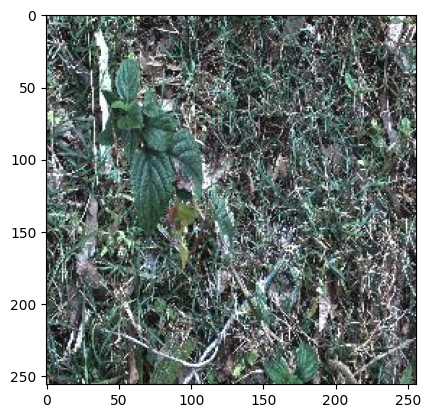

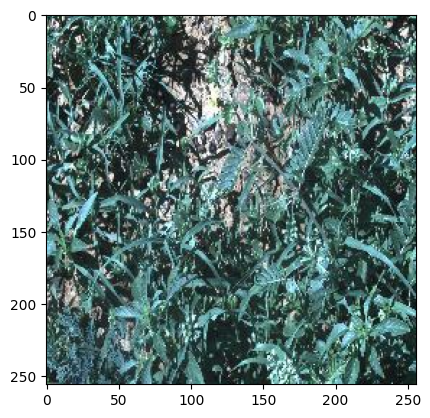

In [7]:
for i in train.sample(n=3, random_state=rng_seed)["image"]:
    img = Image.fromarray(i)
    plt.figure()
    plt.imshow(img)

# 3. сравнение нейросетей
## 3.1. фильтрация классов

In [8]:
bin_train = train[train.label.isin([5,6])]
bin_test = test[test.label.isin([5,6])]

In [9]:
src_shape = bin_train.iloc[0].image.shape
src_shape

(256, 256, 3)

In [10]:
bin_train_labels = [0 if i == 5 else 1 for i in bin_train.label]
bin_test_labels = [0 if i == 5 else 1 for i in bin_test.label]
bin_train_labels = np.array(bin_train_labels)
bin_test_labels = np.array(bin_test_labels)
bin_train_labels.shape, bin_test_labels.shape

((1566,), (517,))

In [11]:
bin_train_images = np.zeros(shape=(bin_train.shape[0],*src_shape), dtype=np.float32)
bin_test_images  = np.zeros(shape=(bin_test.shape[0],*src_shape), dtype=np.float32)
bin_train_images.shape, bin_test_images.shape

((1566, 256, 256, 3), (517, 256, 256, 3))

In [12]:
for idx in range(bin_train_labels.shape[0]):
    bin_train_images[idx,:,:,:] = \
        np.array(Image.fromarray(bin_train.iloc[idx]['image']))

for idx in range(bin_test_labels.shape[0]):
    bin_test_images[idx,:,:,:] = \
        np.array(Image.fromarray(bin_test.iloc[idx]['image']))

bin_train_images.shape, bin_test_images.shape

((1566, 256, 256, 3), (517, 256, 256, 3))

In [13]:
bin_train_images /= 255
bin_test_images /= 255

## 3.2. MLP-сеть

In [14]:
def threshold(t: tf.Tensor):
    return tf.cast(t + 0.5, tf.int32)

def TN(y_true: tf.Tensor, y_predict: tf.Tensor):
    y_predict = threshold(y_predict)
    return tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_true, 0), tf.math.equal(y_predict, 0)), tf.float32))

def TP(y_true: tf.Tensor, y_predict: tf.Tensor):
    y_predict = threshold(y_predict)
    return tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_true, 1), tf.math.equal(y_predict, 1)), tf.float32))

def FN(y_true: tf.Tensor, y_predict: tf.Tensor):
    y_predict = threshold(y_predict)
    return tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_true, 1), tf.math.equal(y_predict, 0)), tf.float32))

def FP(y_true: tf.Tensor, y_predict: tf.Tensor):
    y_predict = threshold(y_predict)
    return tf.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(y_true, 0), tf.math.equal(y_predict, 1)), tf.float32))


def rand_metric(y_true, y_predict):
    return (TP(y_true, y_predict) + TN(y_true, y_predict)) / (TP(y_true, y_predict) + TN(y_true, y_predict) + FP(y_true, y_predict) + FN(y_true, y_predict))

In [15]:
from tensorflow.keras import layers as L
tf.random.set_seed(rng_seed)
neuron_count = 120
regularization_fac = 0.01

# ---> !!! ВНИМАНИЕ !!! <---
# здесь я заменил relu на leaky_relu, потому что без этого значения loss становятся nan.

bin_mlp_model = tf.keras.Sequential([
    L.Input(shape=src_shape),
    L.Flatten(),
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu'),  # 1
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_fac)),  # 2
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu'),  # 3
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_fac)),  # 4
    L.Dense(neuron_count, activation='leaky_relu'),  # 5
    L.Dense(1, activation='sigmoid')
])

bin_mlp_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adafactor(),
    metrics=[rand_metric, tf.keras.metrics.BinaryAccuracy()]
)


In [16]:
bin_mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 120)               23593080  
                                                                 
 dense_1 (Dense)             (None, 105)               12705     
                                                                 
 dense_2 (Dense)             (None, 90)                9540      
                                                                 
 dense_3 (Dense)             (None, 75)                6825      
                                                                 
 dense_4 (Dense)             (None, 60)                4560      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

In [17]:
bin_mlp_hist = bin_mlp_model.fit(
    bin_train_images,
    bin_train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(bin_test_images, bin_test_labels)
)

Epoch 1/100
13/13 [==============================] - 10s 210ms/step - loss: 2.6101 - rand_metric: 0.5295 - binary_accuracy: 0.5147 - val_loss: 2.5759 - val_rand_metric: 0.6022 - val_binary_accuracy: 0.5551
Epoch 2/100
13/13 [==============================] - 2s 146ms/step - loss: 2.5602 - rand_metric: 0.5664 - binary_accuracy: 0.5664 - val_loss: 2.5308 - val_rand_metric: 0.6162 - val_binary_accuracy: 0.5725
Epoch 3/100
13/13 [==============================] - 2s 156ms/step - loss: 2.5131 - rand_metric: 0.5609 - binary_accuracy: 0.5543 - val_loss: 2.4964 - val_rand_metric: 0.5803 - val_binary_accuracy: 0.5280
Epoch 4/100
13/13 [==============================] - 2s 154ms/step - loss: 2.4689 - rand_metric: 0.5770 - binary_accuracy: 0.5734 - val_loss: 2.4380 - val_rand_metric: 0.6216 - val_binary_accuracy: 0.6267
Epoch 5/100
13/13 [==============================] - 1s 106ms/step - loss: 2.4256 - rand_metric: 0.6115 - binary_accuracy: 0.6060 - val_loss: 2.4853 - val_rand_metric: 0.4213 - va

In [18]:
from IPython import display as D
disp = D.display
MD = D.Markdown

In [19]:
from_loss = bin_mlp_hist.history['val_loss'][0]
to_loss = bin_mlp_hist.history['val_loss'][-1]
perc = (from_loss - to_loss) / from_loss
perc *= 100

disp(MD(f"## MLP-модель обучилась на {perc}% (от {from_loss} до {to_loss})"))

## MLP-модель обучилась на 41.64049045082205% (от 2.575878858566284 до 1.5032702684402466)

# 3.3. CNN-модель

In [20]:
tf.random.set_seed(rng_seed)
dropout_rate = 0.3

bin_cnn_model = tf.keras.Sequential([
    L.Input(shape=src_shape),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Flatten(),
    L.Dense(128, activation="selu"),
    L.Dropout(rate=dropout_rate),
    L.Dense(1, activation="sigmoid")
])

bin_cnn_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adamax(),
    metrics=[rand_metric, tf.keras.metrics.BinaryAccuracy()]
)


In [21]:
bin_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 8)        

In [22]:
bin_cnn_hist = bin_cnn_model.fit(
    bin_train_images,
    bin_train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(bin_test_images, bin_test_labels)
)

Epoch 1/100
13/13 [==============================] - 13s 332ms/step - loss: 0.6915 - rand_metric: 0.5214 - binary_accuracy: 0.5185 - val_loss: 0.6870 - val_rand_metric: 0.5944 - val_binary_accuracy: 0.5455
Epoch 2/100
13/13 [==============================] - 2s 160ms/step - loss: 0.6872 - rand_metric: 0.5208 - binary_accuracy: 0.5179 - val_loss: 0.6804 - val_rand_metric: 0.6272 - val_binary_accuracy: 0.5861
Epoch 3/100
13/13 [==============================] - 2s 180ms/step - loss: 0.6755 - rand_metric: 0.6219 - binary_accuracy: 0.6149 - val_loss: 0.6637 - val_rand_metric: 0.6413 - val_binary_accuracy: 0.6035
Epoch 4/100
13/13 [==============================] - 2s 194ms/step - loss: 0.6528 - rand_metric: 0.6126 - binary_accuracy: 0.6009 - val_loss: 0.6360 - val_rand_metric: 0.6575 - val_binary_accuracy: 0.6712
Epoch 5/100
13/13 [==============================] - 2s 140ms/step - loss: 0.6181 - rand_metric: 0.6875 - binary_accuracy: 0.6762 - val_loss: 0.6019 - val_rand_metric: 0.6825 - va

In [23]:
from_loss = bin_cnn_hist.history['val_loss'][0]
to_loss = bin_cnn_hist.history['val_loss'][-1]
perc = (from_loss - to_loss) / from_loss
perc *= 100

disp(MD(f"## CNN-модель обучилась на {perc}% (от {from_loss} до {to_loss})"))

## CNN-модель обучилась на 76.03994942425585% (от 0.6870313882827759 до 0.16461306810379028)

## Вывод: MLP-модель недообучилась, CNN-модель обучилась хорошо

# 4. кривые обучения

Text(0.5, 1.0, 'Кривые обучения MLP-модели')

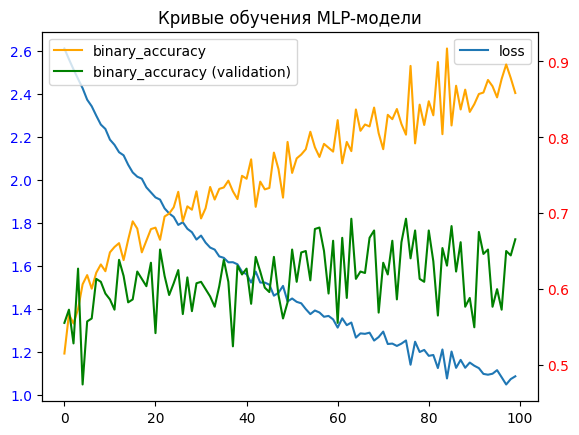

In [24]:
fig = plt.figure()
ax1 = plt.axes()

ax1.plot(bin_mlp_hist.history['loss'], label='loss')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(bin_mlp_hist.history['binary_accuracy'], label='binary_accuracy', color='orange')
ax2.plot(bin_mlp_hist.history['val_binary_accuracy'], label='binary_accuracy (validation)', color='green')

ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
ax2.legend()
plt.title(f"Кривые обучения MLP-модели")

Text(0.5, 1.0, 'Кривые обучения CNN-модели')

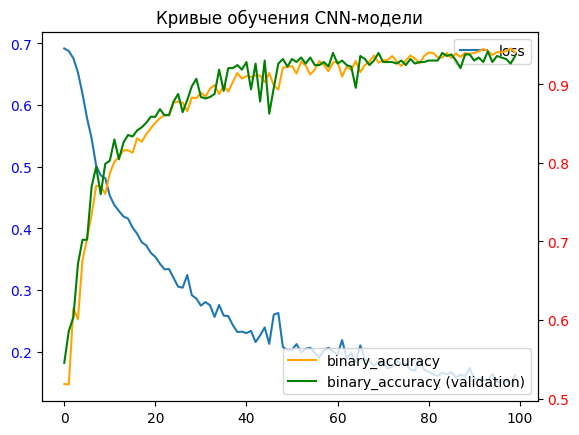

In [25]:
fig = plt.figure()
ax1 = plt.axes()

ax1.plot(bin_cnn_hist.history['loss'], label='loss')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(bin_cnn_hist.history['binary_accuracy'], label='binary_accuracy', color='orange')
ax2.plot(bin_cnn_hist.history['val_binary_accuracy'], label='binary_accuracy (validation)', color='green')

ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
ax2.legend()
plt.title(f"Кривые обучения CNN-модели")

# 5. оценка по rand_index

In [26]:
bin_mlp_predictions = threshold(bin_mlp_model.predict(bin_test_images))
bin_cnn_predictions = threshold(bin_cnn_model.predict(bin_test_images))

17/17 [==============================] - 1s 23ms/step


In [27]:
bmp = np.array(bin_mlp_predictions)
bcp = np.array(bin_cnn_predictions)

In [28]:
print("MLP rand_metric =", rand_metric(bin_test_labels, bmp))
print("CNN rand_metric =", rand_metric(bin_test_labels, bcp))

MLP rand_metric = tf.Tensor(0.5122994, shape=(), dtype=float32)
CNN rand_metric = tf.Tensor(0.50051445, shape=(), dtype=float32)


# 6. ROC-кривые

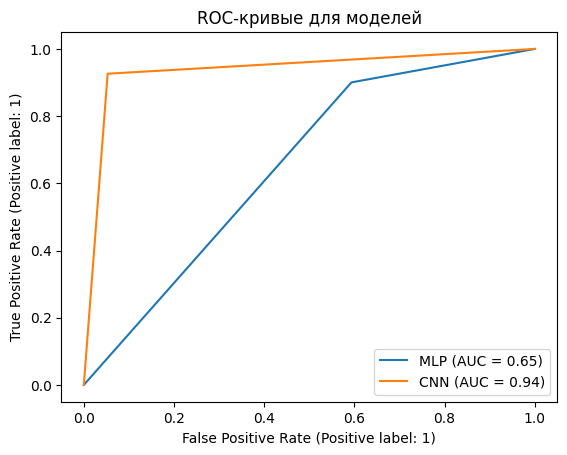

In [29]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(
    bin_test_labels,
    bmp,
    name="MLP",
    ax=ax
)

RocCurveDisplay.from_predictions(
    bin_test_labels,
    bcp,
    name="CNN",
    ax=ax
)

_ = ax.set(
    title="ROC-кривые для моделей",
)

# 7. фильтрация трех классов

In [30]:
# очистка оперативной памяти
del bin_train
del bin_test
del bin_train_images
del bin_test_images
del bin_train_labels
del bin_test_labels

In [31]:
tri_train = train[train.label.isin([5,6,7])]
tri_test = test[test.label.isin([5,6,7])]

In [32]:
label_reprs = {
    5: [1,0,0],
    6: [0,1,0],
    7: [0,0,1]
}

tri_train_labels = [label_reprs[i] for i in tri_train.label]
tri_test_labels = [label_reprs[i] for i in tri_test.label]
tri_train_labels = np.array(tri_train_labels)
tri_test_labels = np.array(tri_test_labels)
tri_train_labels.shape, tri_test_labels.shape

((2311, 3), (788, 3))

In [33]:
tri_train_images = np.zeros(shape=(tri_train.shape[0],*src_shape), dtype=np.float32)
tri_test_images  = np.zeros(shape=(tri_test.shape[0],*src_shape), dtype=np.float32)
tri_train_images.shape, tri_test_images.shape

((2311, 256, 256, 3), (788, 256, 256, 3))

In [34]:
for idx in range(tri_train_labels.shape[0]):
    tri_train_images[idx,:,:,:] = \
        np.array(Image.fromarray(tri_train.iloc[idx]['image']))

for idx in range(tri_test_labels.shape[0]):
    tri_test_images[idx,:,:,:] = \
        np.array(Image.fromarray(tri_test.iloc[idx]['image']))

tri_train_images.shape, tri_test_images.shape

((2311, 256, 256, 3), (788, 256, 256, 3))

In [35]:
tri_train_images /= 255
tri_test_images /= 255

In [36]:
tf.random.set_seed(rng_seed)
neuron_count = 120
regularization_fac = 0.01

# ---> !!! ВНИМАНИЕ !!! <---
# здесь я заменил relu на leaky_relu, потому что без этого значения loss становятся nan.

tri_mlp_model = tf.keras.Sequential([
    L.Input(shape=src_shape),
    L.Flatten(),
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu'),  # 1
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_fac)),  # 2
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu'),  # 3
    L.Dense(eval("[neuron_count, exec('neuron_count -= 15')][0]"), activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_fac)),  # 4
    L.Dense(neuron_count, activation='leaky_relu'),  # 5
    L.Dense(3, activation='softmax')
])

tri_mlp_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adafactor(),
    metrics=[rand_metric, tf.keras.metrics.BinaryAccuracy()]
)

In [38]:
# очистка оперативной памяти
from sys import getsizeof
key = None
Value = None
items_by_size = []
for key, value in locals().items():
  items_by_size.append((key, getsizeof(value)))

items_by_size.sort(key=lambda x: x[1])

In [39]:
items_by_size[-20:]

[('_i20', 1050),
 ('MD', 1072),
 ('_i14', 1146),
 ('RocCurveDisplay', 1200),
 ('items_by_size', 1240),
 ('value', 1240),
 ('bmp', 2196),
 ('bcp', 2196),
 ('_ii', 2228),
 ('_i36', 2228),
 ('_i15', 2310),
 ('tri_test_labels', 19040),
 ('tri_train_labels', 55592),
 ('tri_test', 157616),
 ('tri_train', 462216),
 ('test', 1006152),
 ('df', 2801584),
 ('train', 3156240),
 ('tri_test_images', 619708576),
 ('tri_train_images', 1817444512)]

In [40]:
del bin_mlp_model
del bin_cnn_model
import gc
gc.collect()

232

# 8. сравнение моделей

In [41]:
tri_mlp_hist = tri_mlp_model.fit(
    tri_train_images,
    tri_train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(tri_test_images, tri_test_labels)
)
gc.collect()

Epoch 1/100
19/19 [==============================] - 7s 194ms/step - loss: 2.5573 - rand_metric: 0.6647 - binary_accuracy: 0.6646 - val_loss: 2.5166 - val_rand_metric: 0.6667 - val_binary_accuracy: 0.6667
Epoch 2/100
19/19 [==============================] - 2s 105ms/step - loss: 2.4792 - rand_metric: 0.6726 - binary_accuracy: 0.6729 - val_loss: 2.4437 - val_rand_metric: 0.6670 - val_binary_accuracy: 0.6671
Epoch 3/100
19/19 [==============================] - 2s 111ms/step - loss: 2.4123 - rand_metric: 0.6733 - binary_accuracy: 0.6786 - val_loss: 2.3973 - val_rand_metric: 0.6843 - val_binary_accuracy: 0.6844
Epoch 4/100
19/19 [==============================] - 3s 170ms/step - loss: 2.3462 - rand_metric: 0.6824 - binary_accuracy: 0.6833 - val_loss: 2.3426 - val_rand_metric: 0.6067 - val_binary_accuracy: 0.6053
Epoch 5/100
19/19 [==============================] - 2s 121ms/step - loss: 2.2884 - rand_metric: 0.6809 - binary_accuracy: 0.6817 - val_loss: 2.2984 - val_rand_metric: 0.6707 - val

1355

In [42]:
tf.random.set_seed(rng_seed)
dropout_rate = 0.3

tri_cnn_model = tf.keras.Sequential([
    L.Input(shape=src_shape),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Conv2D(filters=8, kernel_size=(3, 3), activation="swish"),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Flatten(),
    L.Dense(128, activation="selu"),
    L.Dropout(rate=dropout_rate),
    L.Dense(3, activation="softmax")
])

tri_cnn_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adamax(),
    metrics=[rand_metric, tf.keras.metrics.BinaryAccuracy()]
)

In [43]:
tri_cnn_hist = tri_cnn_model.fit(
    tri_train_images,
    tri_train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(tri_test_images, tri_test_labels)
)
gc.collect()

Epoch 1/100
19/19 [==============================] - 8s 267ms/step - loss: 0.6474 - rand_metric: 0.6683 - binary_accuracy: 0.6684 - val_loss: 0.6344 - val_rand_metric: 0.6667 - val_binary_accuracy: 0.6667
Epoch 2/100
19/19 [==============================] - 3s 134ms/step - loss: 0.6299 - rand_metric: 0.6669 - binary_accuracy: 0.6670 - val_loss: 0.6216 - val_rand_metric: 0.6667 - val_binary_accuracy: 0.6667
Epoch 3/100
19/19 [==============================] - 3s 137ms/step - loss: 0.6125 - rand_metric: 0.6697 - binary_accuracy: 0.6749 - val_loss: 0.5945 - val_rand_metric: 0.6996 - val_binary_accuracy: 0.6950
Epoch 4/100
19/19 [==============================] - 4s 216ms/step - loss: 0.5790 - rand_metric: 0.7227 - binary_accuracy: 0.7157 - val_loss: 0.5696 - val_rand_metric: 0.7107 - val_binary_accuracy: 0.7030
Epoch 5/100
19/19 [==============================] - 3s 145ms/step - loss: 0.5539 - rand_metric: 0.7165 - binary_accuracy: 0.7141 - val_loss: 0.5328 - val_rand_metric: 0.7369 - val

1354

In [46]:
tri_mlp_predictions = threshold(tri_mlp_model.predict(tri_test_images))
tri_cnn_predictions = threshold(tri_cnn_model.predict(tri_test_images))

25/25 [==============================] - 1s 26ms/step


In [47]:
tmp = np.array(tri_mlp_predictions)
tcp = np.array(tri_cnn_predictions)

In [48]:
print("MLP rand_metric =", rand_metric(tri_test_labels, tmp))
print("CNN rand_metric =", rand_metric(tri_test_labels, tcp))

MLP rand_metric = tf.Tensor(0.6751269, shape=(), dtype=float32)
CNN rand_metric = tf.Tensor(0.8278342, shape=(), dtype=float32)


# 9. кривые обучения

Text(0.5, 1.0, 'Кривые обучения MLP-модели')

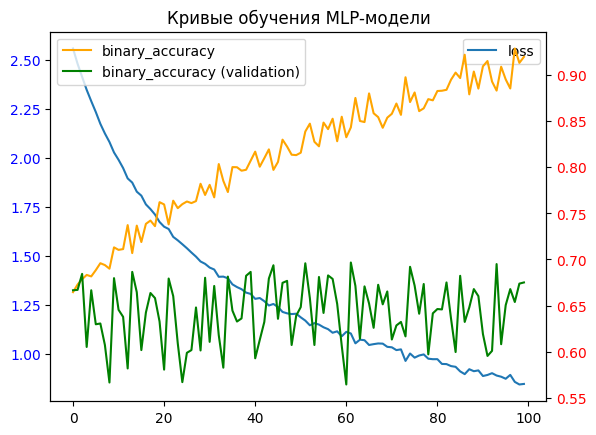

In [49]:
fig = plt.figure()
ax1 = plt.axes()

ax1.plot(tri_mlp_hist.history['loss'], label='loss')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(tri_mlp_hist.history['binary_accuracy'], label='binary_accuracy', color='orange')
ax2.plot(tri_mlp_hist.history['val_binary_accuracy'], label='binary_accuracy (validation)', color='green')

ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
ax2.legend()
plt.title(f"Кривые обучения MLP-модели")

Text(0.5, 1.0, 'Кривые обучения CNN-модели')

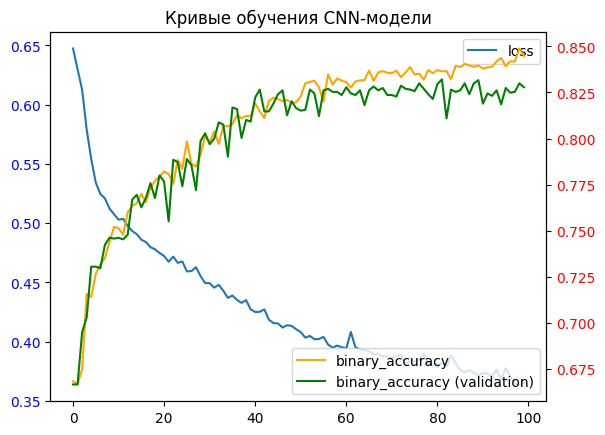

In [50]:
fig = plt.figure()
ax1 = plt.axes()

ax1.plot(tri_cnn_hist.history['loss'], label='loss')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(tri_cnn_hist.history['binary_accuracy'], label='binary_accuracy', color='orange')
ax2.plot(tri_cnn_hist.history['val_binary_accuracy'], label='binary_accuracy (validation)', color='green')

ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
ax2.legend()
plt.title(f"Кривые обучения CNN-модели")